In [1]:
import scanpy as sc
import omicverse as ov
import scvelo as scv
import matplotlib.pyplot as plt
ov.ov_plot_set()



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.4, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


In [2]:
ad =scv.datasets.dentategyrus()
ad

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [3]:
scv.pp.filter_genes(ad, min_shared_counts=20)
scv.pp.normalize_per_cell(ad)
ad.raw=ad.copy()
scv.pp.filter_genes_dispersion(ad, n_top_genes=2000)
scv.pp.log1p(ad)

Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


/tmp/ipykernel_709815/1265908923.py:5: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(ad)


In [56]:
scv.pp.filter_and_normalize(ad, min_shared_counts=30, n_top_genes=2000)

Filtered out 477 genes that are detected 30 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.


/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [4]:
sc.pp.pca(ad)
sc.pp.neighbors(ad, n_pcs=30, n_neighbors=30)
scv.pp.moments(ad, n_pcs=None, n_neighbors=None)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.velocity(ad,n_jobs=8)
scv.tl.velocity_graph(ad,n_jobs=8)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 8/12 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [6]:
scv.tl.recover_dynamics(ad,n_jobs=8)

recovering dynamics (using 8/12 cores)


  0%|          | 0/557 [00:00<?, ?gene/s]

    finished (0:00:36) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [7]:
scv.tl.latent_time(ad)

computing terminal states
    identified 5 regions of root cells and 5 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [8]:
ad

AnnData object with n_obs × n_vars = 2930 × 2000
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling'
    uns: 'clusters_colors', 'log1p', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'recover_dynamics'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs', 'loss'
    layers: 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'fit_t', 'fit_tau', 'fit_tau_'
    obsp: 'distances', 'connec

In [9]:
top_genes = ad.var['fit_likelihood'].sort_values(ascending=False).index[:100]
#scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters')

<AxesSubplot: xlabel='X_umap1', ylabel='X_umap2'>

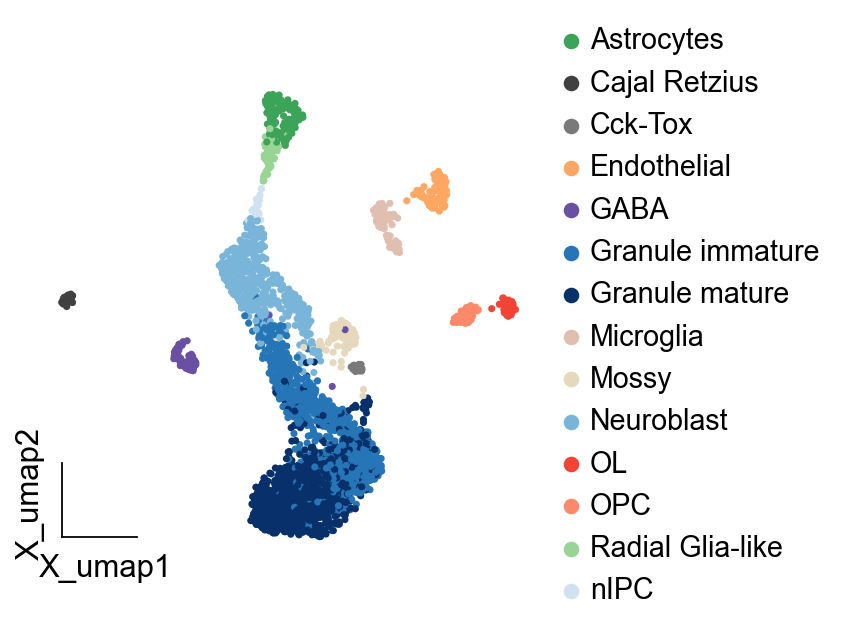

In [11]:
ov.pl.embedding(ad,
                basis="X_umap",
                color=['clusters'],title='',#size=15,
                show=False, #legend_loc=None, add_outline=False, 
                frameon='small',legend_fontoutline=2,#ax=ax
)

In [5]:
ad.obs['celltype'].cat.categories


Index(['CLP', 'Ery', 'EryPre1', 'EryPre2', 'HMP', 'HSC', 'MEP', 'Mega', 'Mono',
       'MonoPre', 'MyeloidPre', 'MylEry', 'NaiveB', 'cDC', 'pDC', 'preB',
       'preproB', 'proB'],
      dtype='object')

/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:497: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(cax, orientation="vertical", cax=cax1)


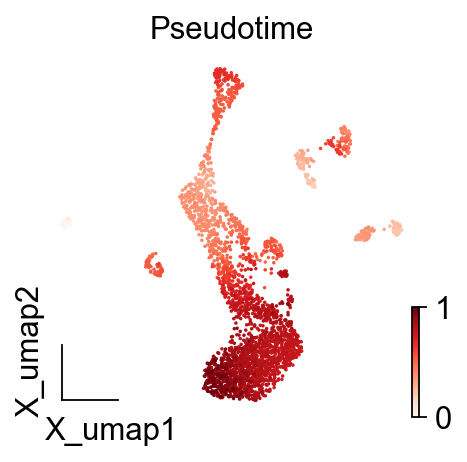

In [63]:
fig, ax = plt.subplots(figsize=(3,3))
ov.pl.embedding(
    ad,
    basis="X_umap",
    color=['latent_time'],title='',
    show=False,  
    frameon='small',
    size=10,
    cmap='Reds',
    #palette=ov.pl.red_color[:7]+ov.pl.green_color[:6]+ov.pl.blue_color[:],
    ax=ax,
    legend_loc=None, add_outline=False, 
)
ax.set_title('Pseudotime', fontsize=14)
plt.savefig(f'figures/dg/umap-pt-33.png',dpi=300,bbox_inches='tight')
plt.savefig(f'pdf/dg/umap-pt-33.pdf',dpi=300,bbox_inches='tight')



In [223]:
var_name=ad.var['fit_likelihood'].sort_values(ascending=False).index[:200]

/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


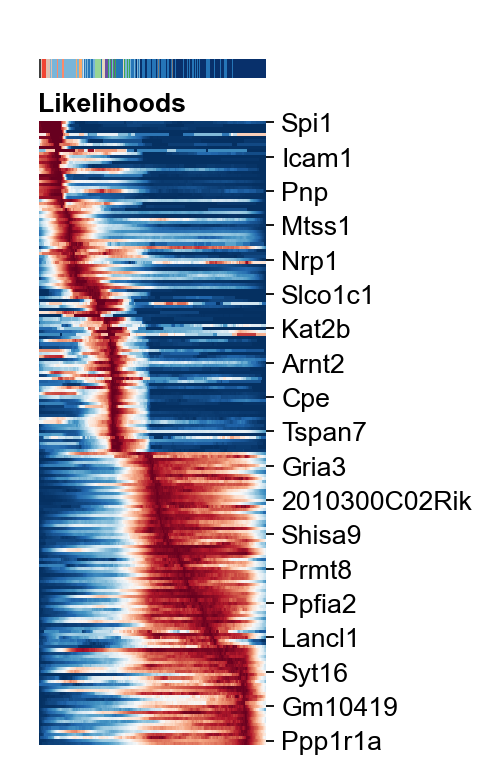

In [225]:
g=ov.utils.plot_heatmap(ad_raw,var_names=var_name,
                  sortby='latent_time',col_color='clusters',
                 n_convolve=500,figsize=(1,6),show=False,)

g.fig.set_size_inches(2, 6)
g.fig.suptitle('Likelihoods',x=0.25,y=0.83,
               horizontalalignment='left',fontsize=12,fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=12)

plt.savefig(f'figures/dg/heatmap_likelihood.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'pdf/hsc/heatmap_omicfate.pdf',dpi=300,bbox_inches='tight')



## pearsonr

In [9]:
from scipy.stats import pearsonr
from tqdm import tqdm
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

def pearson_coef(adata, pesudotime, n_jobs=-1):
    # 提取时间序列并排序
    t_series = adata.obs[pesudotime].sort_values()
    pearson_li = []
    p_li = []

    # 转换数据以便于加速
    data_matrix = adata[t_series.index,:].X.toarray()

    # 定义计算单个基因的Pearson相关系数的函数
    def compute_pearson(i):
        expr_values = data_matrix[:, i]
        pe, p = pearsonr(t_series.values, expr_values)
        return pe, p

    # 并行计算
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_pearson)(i) for i in tqdm(range(data_matrix.shape[1]), desc="Calculating Pearson correlations")
    )

    # 将结果解包
    for pe, p in results:
        pearson_li.append(pe)
        p_li.append(p)
    
    # 创建结果数据框
    pearson_pd = pd.DataFrame({
        'pearson': pearson_li,
        'pvalue': p_li
    }, index=adata.var_names)
    
    return pearson_pd


ad_raw=ad.raw.to_adata()
res_pr=pearson_coef(ad_raw,'latent_time')


Calculating Pearson correlations: 100%|██████████| 3573/3573 [00:00<00:00, 6039.38it/s]


In [10]:
from statsmodels.stats.multitest import multipletests
import numpy as np
qvalue = multipletests(np.nan_to_num(np.array(res_pr['pvalue']),0), alpha=0.5, 
                               method='fdr_bh', is_sorted=False, returnsorted=False)
res_pr['qvalue']=qvalue[1]
res_pr['abs_pearson']=abs(res_pr['pearson'])
res_pr=res_pr.sort_values('pearson',ascending=False)

In [11]:
var_name=res_pr.loc[res_pr['abs_pearson']>np.max(res_pr['abs_pearson'])*0.5].index.tolist()

/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


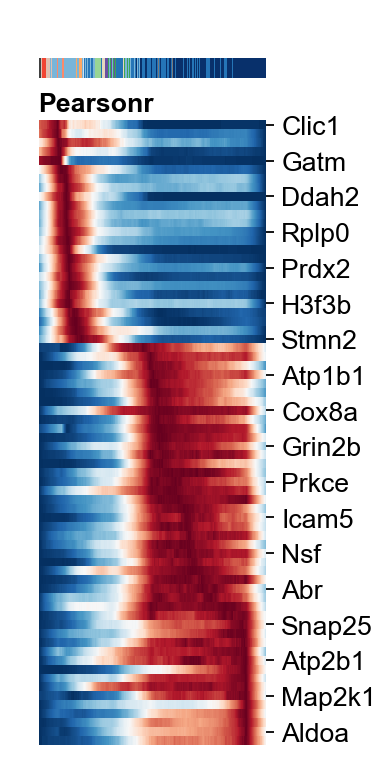

In [129]:
g=ov.utils.plot_heatmap(ad_raw,var_names=var_name,
                  sortby='latent_time',col_color='clusters',
                 n_convolve=500,figsize=(1,6),show=False,)

g.fig.set_size_inches(2, 6)
g.fig.suptitle('Pearsonr',x=0.25,y=0.83,
               horizontalalignment='left',fontsize=12,fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=12)

plt.savefig(f'figures/dg/heatmap_pearsonr.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'pdf/hsc/heatmap_pearsonr.pdf',dpi=300,bbox_inches='tight')



## OmicFate

In [12]:
cfg_obj2=ov.single.Fate(ad_raw,pseudotime='latent_time')
cfg_obj2.model_init(test_size=0.6)

$MSE|RMSE|MAE|R^2$:0.0074|0.086|0.066|0.84


,coef,abs(coef),values
index,,,
Ramp1,-6.747378e-03,6.747378e-03,0.939178
Tmem163,-6.705508e-03,6.705508e-03,0.052458
Clstn2,-6.283917e-03,6.283917e-03,0.316313
Cdkn1c,-6.254375e-03,6.254375e-03,0.061585
Ccdc34,-6.210695e-03,6.210695e-03,0.160242
...,...,...,...
Mrpl4,-4.814836e-06,4.814836e-06,0.249966
Ndufa4,-4.204339e-06,4.204339e-06,3.698160
Ubr1,-3.697704e-06,3.697704e-06,0.048140


In [13]:
cfg_obj2.ATR(stop=500)

coef_threshold:0.002750938758254051, r2:0.8301421909546194


,coef_threshold,r2
0,0.006706,0.039148
1,0.006284,0.050693
2,0.006254,0.067985
3,0.006211,0.078791
4,0.006181,0.128932
...,...,...
495,0.002277,0.834747
496,0.002275,0.834955
497,0.002275,0.834914
498,0.002272,0.835059


Text(0.5, 1.0, 'HSC\nOmicFate')

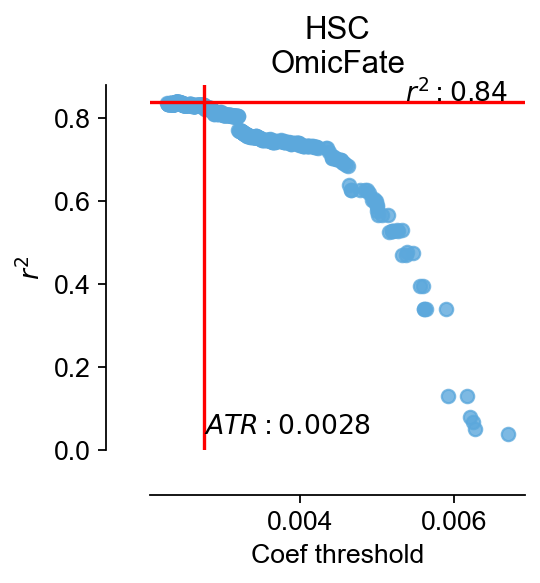

In [14]:
fig,ax=cfg_obj2.plot_filtering(color='#5ca8dc')
ax.set_title('HSC\nOmicFate')

In [15]:
res=cfg_obj2.model_fit()

$MSE|RMSE|MAE|R^2$:0.0072|0.085|0.065|0.85


(<Figure size 240x240 with 1 Axes>,
 <AxesSubplot: title={'center': 'Dimension: 3573'}, xlabel='Raw', ylabel='Predicted'>)

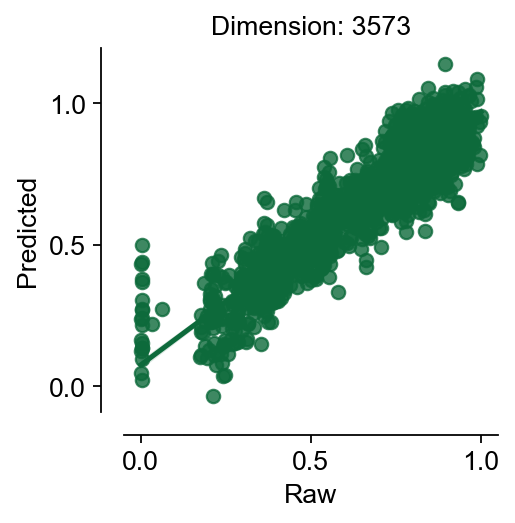

In [16]:
cfg_obj2.plot_fitting(type='raw')

Text(1.1, 0.5, 'rmse')

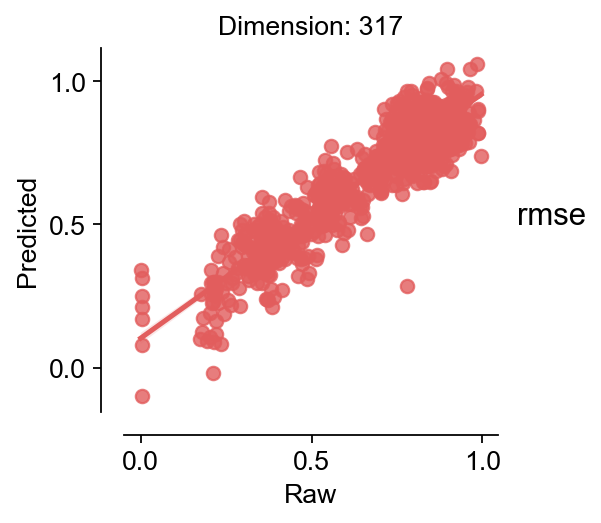

In [17]:
fig,ax=cfg_obj2.plot_fitting(type='filter',color='#e25d5d')
ax.text(1.1,0.5,'rmse')

In [18]:
cfg_obj2.filter_coef

,coef,abs(coef),values
index,,,
Tmem163,-0.042133,0.042133,0.052458
Cdkn1c,-0.021293,0.021293,0.061585
Clic1,-0.020184,0.020184,0.166573
Pcyox1,-0.017116,0.017116,0.120005
Arpp21,0.015670,0.015670,0.414851
...,...,...,...
Sqstm1,0.000125,0.000125,0.235368
Tra2a,0.000064,0.000064,0.147866
Snrpb,-0.000043,0.000043,0.790929


In [19]:
var_name=cfg_obj2.filter_coef.loc[cfg_obj2.filter_coef['abs(coef)']>0.005].index.tolist()

/mnt/home/zehuazeng/software/rsc/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


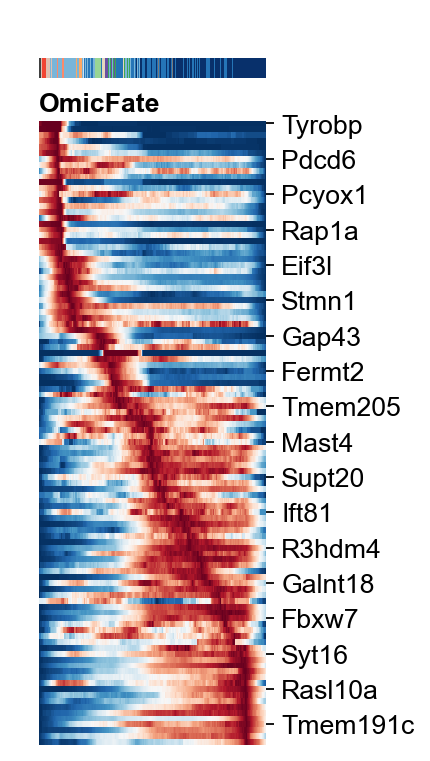

In [210]:
g=ov.utils.plot_heatmap(ad_raw,var_names=var_name,
                  sortby='latent_time',col_color='clusters',
                 n_convolve=500,figsize=(1,6),show=False,)

g.fig.set_size_inches(2, 6)
g.fig.suptitle('OmicFate',x=0.25,y=0.83,
               horizontalalignment='left',fontsize=12,fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),fontsize=12)

plt.savefig(f'figures/dg/heatmap_omicfate.png',dpi=300,bbox_inches='tight')
#plt.savefig(f'pdf/hsc/heatmap_omicfate.pdf',dpi=300,bbox_inches='tight')



## Metric

In [20]:
res_pd=pd.DataFrame(columns=['mse','rmse','mae','r2','num_genes'])

In [21]:
#pearsonr
import numpy as np
#var_genes=p_pd.sort_values('pvalue').index.tolist()[:50]
var_genes=res_pr.loc[res_pr['abs_pearson']>np.max(res_pr['abs_pearson'])*0.4].index
print('Pr',np.max(res_pr['abs_pearson'])*0.4)
cfg_obj_test=ov.single.Fate(ad_raw[:,var_genes],
                                 pseudotime='latent_time')
a=cfg_obj_test.model_init()
len(var_genes)

Pr 0.2630062938763362
$MSE|RMSE|MAE|R^2$:0.0058|0.076|0.054|0.88


146

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_test=cfg_obj_test.y_test_r
y_pred=pd.Series(cfg_obj_test.y_pred_r)
y_pred.index=y_test.index
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
res_pd.loc['pearsonr']=[mse,rmse,mae,r2,len(var_genes)]
res_pd.head()

,mse,rmse,mae,r2,num_genes
pearsonr,0.005783,0.076047,0.054288,0.875072,146.0


In [23]:
#cfg genes
var_genes=cfg_obj2.filter_coef.loc[cfg_obj2.filter_coef['abs(coef)']>0.005].index.tolist()
cfg_obj_test=ov.single.Fate(ad_raw[:,var_genes],
                                 pseudotime='latent_time')
a=cfg_obj_test.model_init()
len(var_genes)

$MSE|RMSE|MAE|R^2$:0.0088|0.094|0.072|0.81


106

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_test=cfg_obj_test.y_test_r
y_pred=pd.Series(cfg_obj_test.y_pred_r)
y_pred.index=y_test.index
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
res_pd.loc['omicfate']=[mse,rmse,mae,r2,len(var_genes)]
res_pd.head()

,mse,rmse,mae,r2,num_genes
pearsonr,0.005783,0.076047,0.054288,0.875072,146.0
omicfate,0.008826,0.093948,0.071969,0.809333,106.0


In [25]:
#likelihoods
var_genes=ad.var['fit_likelihood'].sort_values(ascending=False).index[:200]
cfg_obj_test=ov.single.Fate(ad_raw[:,var_genes],
                                 pseudotime='latent_time')
a=cfg_obj_test.model_init()
len(var_genes)

$MSE|RMSE|MAE|R^2$:0.008|0.09|0.066|0.83


200

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_test=cfg_obj_test.y_test_r
y_pred=pd.Series(cfg_obj_test.y_pred_r)
y_pred.index=y_test.index
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
res_pd.loc['likelihoods']=[mse,rmse,mae,r2,len(var_genes)]
res_pd.head()

,mse,rmse,mae,r2,num_genes
pearsonr,0.005783,0.076047,0.054288,0.875072,146.0
omicfate,0.008826,0.093948,0.071969,0.809333,106.0
likelihoods,0.008046,0.089699,0.065664,0.826190,200.0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(X,y):
    #X = data[['pseudotime']]
    #y = data['genes']
    X=np.array(X).reshape(-1, 1)
    
    # 线性回归模型
    model = LinearRegression()
    model.fit(X, y)
    
    # 预测值
    y_pred = model.predict(X)
    
    # 计算指标
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    # 综合指标
    comprehensive_score = 100 * r2 - 2 * mse - mae
    
    return r2, mse, mae, comprehensive_score

In [29]:
kt_li=[]
lr_li=[]
for var_name in [res_pr.loc[res_pr['abs_pearson']>np.max(res_pr['abs_pearson'])*0.5].index,
                cfg_obj2.filter_coef.index.tolist(),
                ad.var['fit_likelihood'].sort_values(ascending=False).index[:100]]:
    gt_obj=ov.single.gene_trends(ad_raw,'latent_time',var_name)
    gt_obj.calculate(n_convolve=100)

    import numpy as np
    max_avg_li=[]
    for data_array in gt_obj.normalized_data:
        # 找到值大于 0.8 的元素的索引
        indices = np.where(data_array >= np.max(data_array)*0.8)
        
        # 计算索引的平均值
        average_index = np.mean(indices)
        #print(average_index)
        max_avg_li.append(average_index)
    res=evaluate_model(range(len(max_avg_li)),
              max_avg_li)
    
    kt_li.append(gt_obj.kt[0])
    lr_li.append(res[0])
res_pd['Kendalltau']=kt_li
res_pd['Linregress']=lr_li

In [30]:
res_pd.head()

,mse,rmse,mae,r2,num_genes,Kendalltau,Linregress
pearsonr,0.005783,0.076047,0.054288,0.875072,146.0,0.758071,0.715595
omicfate,0.008826,0.093948,0.071969,0.809333,106.0,0.877412,0.913941
likelihoods,0.008046,0.089699,0.065664,0.826190,200.0,0.872844,0.901087


In [31]:
res_pd.to_csv('result/dg_raw_coef.csv')

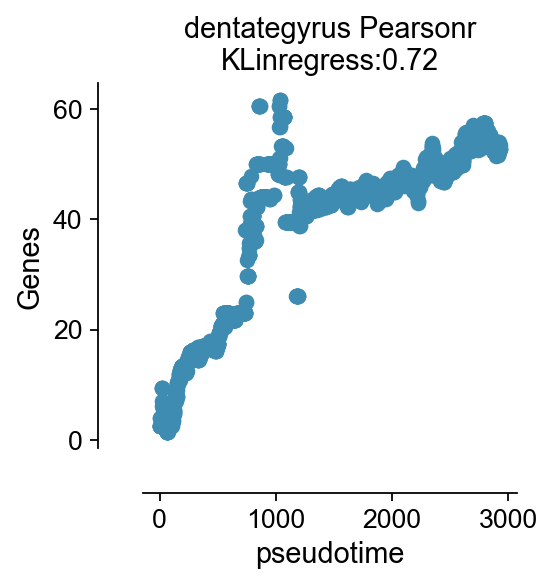

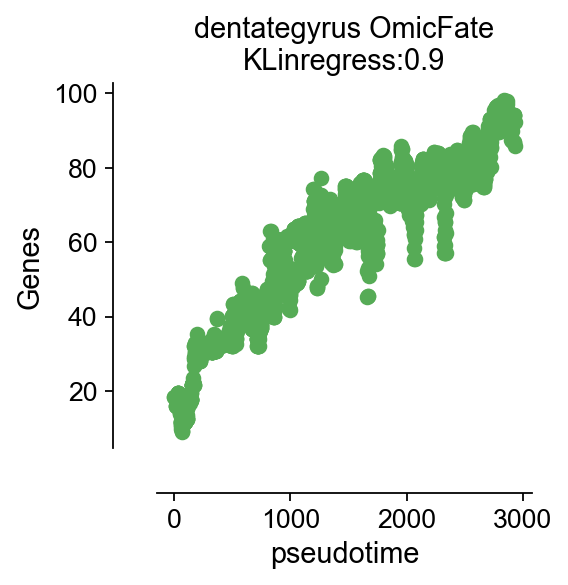

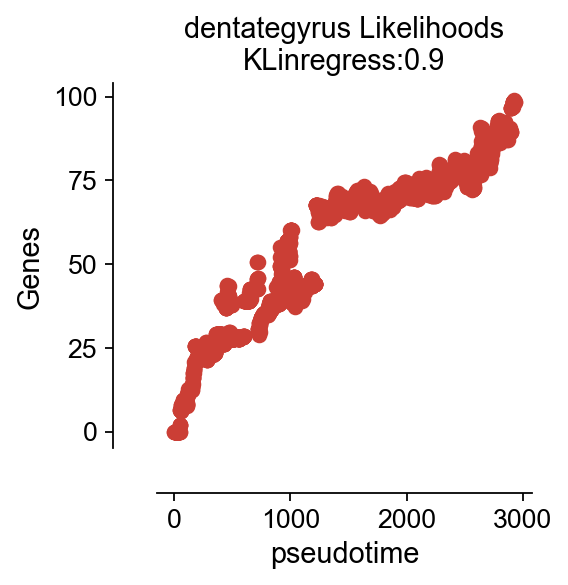

In [33]:
for var_name,color,name in zip([res_pr.loc[res_pr['abs_pearson']>np.max(res_pr['abs_pearson'])*0.5].index,
                cfg_obj2.filter_coef.loc[cfg_obj2.filter_coef['abs(coef)']>0.005].index.tolist(),
                               ad.var['fit_likelihood'].sort_values(ascending=False).index[:100]],
                   [ov.utils.blue_color[3],ov.utils.green_color[2],ov.utils.red_color[2]],
                              ['Pearsonr','OmicFate','Likelihoods']):
    gt_obj=ov.single.gene_trends(ad_raw,'latent_time',var_name)
    gt_obj.calculate(n_convolve=100)

    import numpy as np
    max_avg_li=[]
    for data_array in gt_obj.normalized_data:
        # 找到值大于 0.8 的元素的索引
        indices = np.where(data_array >= np.max(data_array)*0.8)
        
        # 计算索引的平均值
        average_index = np.mean(indices)
        #print(average_index)
        max_avg_li.append(average_index)
    res=evaluate_model(range(len(max_avg_li)),
              max_avg_li)

    fig,ax=gt_obj.plot_trend(color=color)
    ax.set_title('dentategyrus {}\nKLinregress:{:.2}'.format(name,res[0]),fontsize=13)
    #ax.set_xticklabels([0,0.25,0.5,0.75,1])
    plt.savefig(f'figures/dg/scatter_Dg_{name}.png',dpi=300,bbox_inches='tight')
    plt.savefig(f'pdf/dg/scatter_Dg_{name}.pdf',dpi=300,bbox_inches='tight')

    